### 2. Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

import warnings
warnings.filterwarnings('ignore')

#!pip install xgboost

### 3. Data Loading

In [114]:
df = pd.read_csv(r'seattle-weather.csv')

In [5]:
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


## 4. Data Cleaning

In [7]:
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [9]:
df.shape

(1461, 6)

In [10]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [11]:
df.tail()

,date,precipitation,temp_max,temp_min,wind,weather
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun
1460,2015-12-31,0.0,5.6,-2.1,3.5,sun


In [12]:
df['weather'].unique()

array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

## 5.Feature Engineering

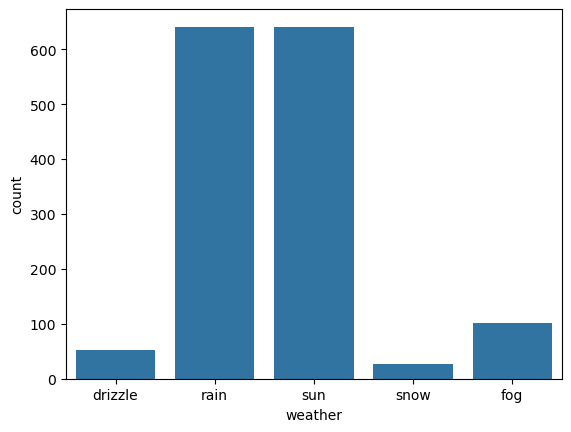

In [116]:
sns.countplot(x='weather', data=df)
plt.show()

In [15]:
df.dtypes

date              object
precipitation    float64
temp_max         float64
temp_min         float64
wind             float64
weather           object
dtype: object

In [118]:
df['date'] = pd.to_datetime(df['date'])

In [120]:
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.weekday


In [122]:
df['date_ord'] = df['date'].rank(method='dense').astype(int)


In [124]:
df.columns

Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather',
       'month', 'day', 'weekday', 'date_ord'],
      dtype='object')

In [126]:
df.dtypes

date             datetime64[ns]
precipitation           float64
temp_max                float64
temp_min                float64
wind                    float64
weather                  object
month                     int32
day                       int32
weekday                   int32
date_ord                  int32
dtype: object

In [21]:
df

,date,precipitation,temp_max,temp_min,wind,weather,month,day,weekday,date_ord
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,1,1,6,1
1,2012-01-02,10.9,10.6,2.8,4.5,rain,1,2,0,2
2,2012-01-03,0.8,11.7,7.2,2.3,rain,1,3,1,3
3,2012-01-04,20.3,12.2,5.6,4.7,rain,1,4,2,4
4,2012-01-05,1.3,8.9,2.8,6.1,rain,1,5,3,5
...,...,...,...,...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain,12,27,6,1457
1457,2015-12-28,1.5,5.0,1.7,1.3,rain,12,28,0,1458
1458,2015-12-29,0.0,7.2,0.6,2.6,fog,12,29,1,1459
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun,12,30,2,1460


In [128]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()

In [130]:
oe.fit_transform(df[['date','weather']])

array([[0.000e+00, 0.000e+00],
       [1.000e+00, 2.000e+00],
       [2.000e+00, 2.000e+00],
       ...,
       [1.458e+03, 1.000e+00],
       [1.459e+03, 4.000e+00],
       [1.460e+03, 4.000e+00]])

In [132]:
df.select_dtypes('object').columns

Index(['weather'], dtype='object')

In [134]:
dw = df.select_dtypes('object').columns

In [26]:
df.duplicated().sum()

0

In [144]:
df[dw]= oe.fit_transform(df[dw])

In [146]:
df

,date,precipitation,temp_max,temp_min,wind,weather,month,day,weekday,date_ord
0,2012-01-01,0.000000,12.8,5.0,4.7,0.0,1,1,6,1
1,2012-01-02,2.476538,10.6,2.8,4.5,2.0,1,2,0,2
2,2012-01-03,0.587787,11.7,7.2,2.3,2.0,1,3,1,3
3,2012-01-04,3.058707,12.2,5.6,4.7,2.0,1,4,2,4
4,2012-01-05,0.832909,8.9,2.8,6.1,2.0,1,5,3,5
...,...,...,...,...,...,...,...,...,...,...
1456,2015-12-27,2.261763,4.4,1.7,2.9,2.0,12,27,6,1457
1457,2015-12-28,0.916291,5.0,1.7,1.3,2.0,12,28,0,1458
1458,2015-12-29,0.000000,7.2,0.6,2.6,1.0,12,29,1,1459
1459,2015-12-30,0.000000,5.6,-1.0,3.4,4.0,12,30,2,1460


In [148]:
df.describe()

,date,precipitation,temp_max,temp_min,wind,weather,month,day,weekday,date_ord
count,1461,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000
mean,2013-12-31 00:00:00,0.696416,16.439083,8.234771,3.241136,2.752225,6.522930,15.729637,2.997947,731.000000
min,2012-01-01 00:00:00,0.000000,-1.600000,-7.100000,0.400000,0.000000,1.000000,1.000000,0.000000,1.000000
25%,2012-12-31 00:00:00,0.000000,10.600000,4.400000,2.200000,2.000000,4.000000,8.000000,1.000000,366.000000
50%,2013-12-31 00:00:00,0.000000,15.600000,8.300000,3.000000,2.000000,7.000000,16.000000,3.000000,731.000000
75%,2014-12-31 00:00:00,1.335001,22.200000,12.200000,4.000000,4.000000,10.000000,23.000000,5.000000,1096.000000
max,2015-12-31 00:00:00,4.041295,35.600000,18.300000,9.500000,4.000000,12.000000,31.000000,6.000000,1461.000000
std,NaN,1.018216,7.349758,5.023004,1.437825,1.191380,3.449884,8.803105,2.001197,421.898685


In [150]:
df['precipitation'] = np.log1p(df['precipitation'])

In [152]:
df.describe()

,date,precipitation,temp_max,temp_min,wind,weather,month,day,weekday,date_ord
count,1461,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000
mean,2013-12-31 00:00:00,0.383380,16.439083,8.234771,3.241136,2.752225,6.522930,15.729637,2.997947,731.000000
min,2012-01-01 00:00:00,0.000000,-1.600000,-7.100000,0.400000,0.000000,1.000000,1.000000,0.000000,1.000000
25%,2012-12-31 00:00:00,0.000000,10.600000,4.400000,2.200000,2.000000,4.000000,8.000000,1.000000,366.000000
50%,2013-12-31 00:00:00,0.000000,15.600000,8.300000,3.000000,2.000000,7.000000,16.000000,3.000000,731.000000
75%,2014-12-31 00:00:00,0.848012,22.200000,12.200000,4.000000,4.000000,10.000000,23.000000,5.000000,1096.000000
max,2015-12-31 00:00:00,1.617663,35.600000,18.300000,9.500000,4.000000,12.000000,31.000000,6.000000,1461.000000
std,NaN,0.509321,7.349758,5.023004,1.437825,1.191380,3.449884,8.803105,2.001197,421.898685


In [154]:
df['weather'].value_counts()

weather
2.0    641
4.0    640
1.0    101
0.0     53
3.0     26
Name: count, dtype: int64

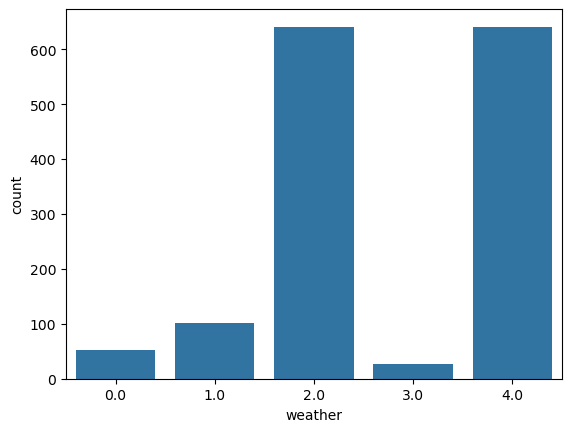

In [156]:
sns.countplot(x='weather', data=df)
plt.show()

In [158]:
df.corr()

,date,precipitation,temp_max,temp_min,wind,weather,month,day,weekday,date_ord
date,1.000000,-0.049444,0.145827,0.164249,-0.039163,0.067043,0.250292,0.022101,-0.000594,1.000000
precipitation,-0.049444,1.000000,-0.385497,-0.157114,0.367953,-0.445128,-0.013312,0.032463,-0.001189,-0.049444
temp_max,0.145827,-0.385497,1.000000,0.875687,-0.164857,0.322337,0.154198,-0.040376,-0.003371,0.145827
temp_min,0.164249,-0.157114,0.875687,1.000000,-0.074185,0.154981,0.216689,-0.008082,0.002549,0.164249
wind,-0.039163,0.367953,-0.164857,-0.074185,1.000000,-0.065858,-0.048125,-0.033699,0.026190,-0.039163
weather,0.067043,-0.445128,0.322337,0.154981,-0.065858,1.000000,0.022880,-0.040939,0.009841,0.067043
month,0.250292,-0.013312,0.154198,0.216689,-0.048125,0.022880,1.000000,0.010522,-0.003019,0.250292
day,0.022101,0.032463,-0.040376,-0.008082,-0.033699,-0.040939,0.010522,1.000000,0.000591,0.022101
weekday,-0.000594,-0.001189,-0.003371,0.002549,0.026190,0.009841,-0.003019,0.000591,1.000000,-0.000594
date_ord,1.000000,-0.049444,0.145827,0.164249,-0.039163,0.067043,0.250292,0.022101,-0.000594,1.000000


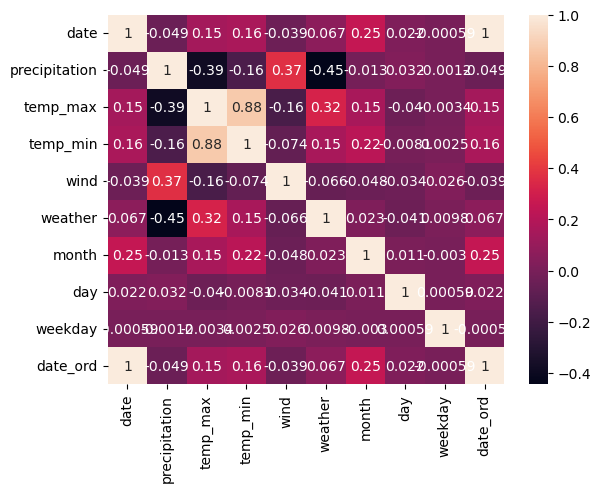

In [160]:
sns.heatmap(df.corr(), annot=True)
plt.show()

## 6. EDA

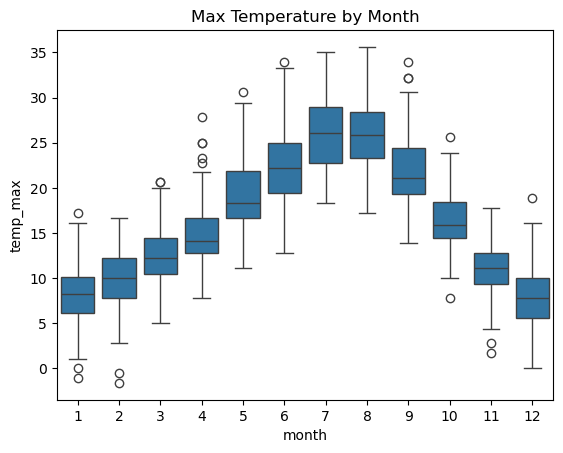

In [163]:
#Max Temp by Month (Seasonality)

sns.boxplot(x='month', y='temp_max', data=df)
plt.title('Max Temperature by Month')
plt.show()

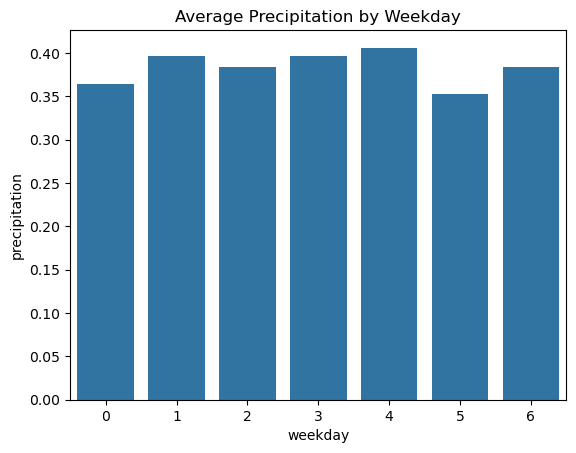

In [165]:
#Precipitation by Weekday

sns.barplot(x='weekday', y='precipitation', data=df, ci=None)
plt.title('Average Precipitation by Weekday')
plt.show()


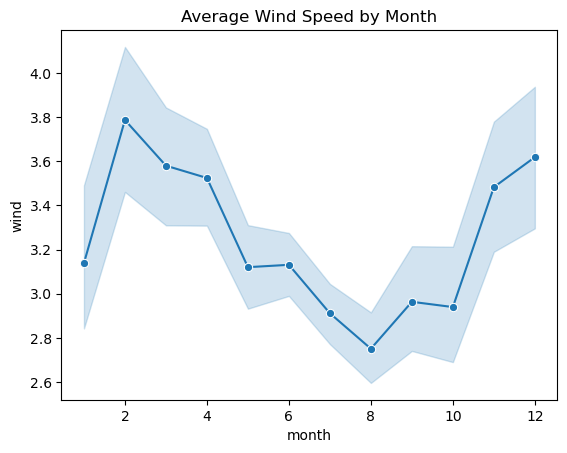

In [167]:
#Wind by Month

sns.lineplot(x='month', y='wind', data=df, marker='o')
plt.title('Average Wind Speed by Month')
plt.show()


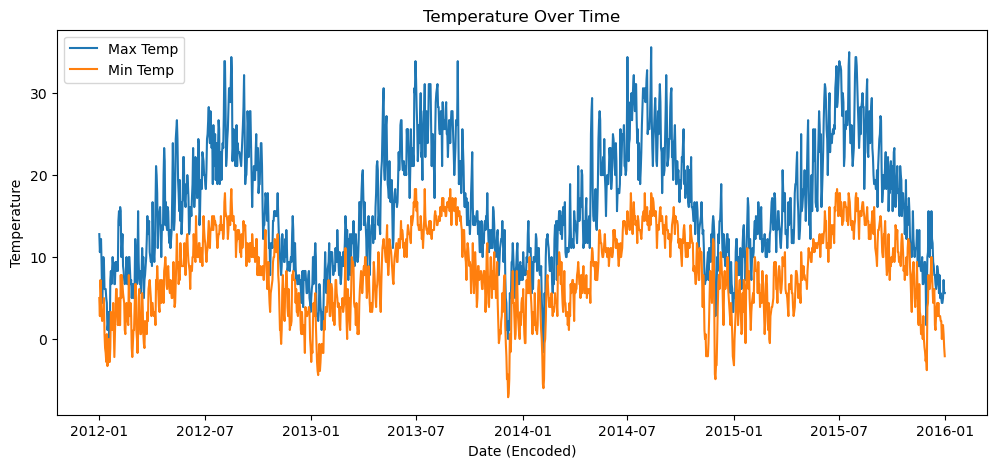

In [169]:
# Temperature over time

plt.figure(figsize=(12,5))
plt.plot(df['date'], df['temp_max'], label='Max Temp')
plt.plot(df['date'], df['temp_min'], label='Min Temp')
plt.xlabel('Date (Encoded)')
plt.ylabel('Temperature')
plt.title('Temperature Over Time')
plt.legend()
plt.show()

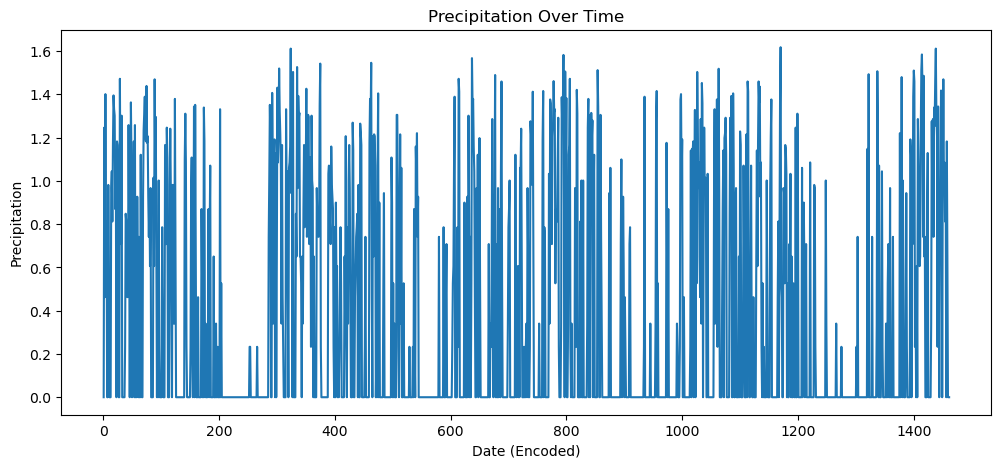

In [171]:
# Precipitation over time
plt.figure(figsize=(12,5))
plt.plot(df['date_ord'], df['precipitation'])
plt.xlabel('Date (Encoded)')
plt.ylabel('Precipitation')
plt.title('Precipitation Over Time')
plt.show()


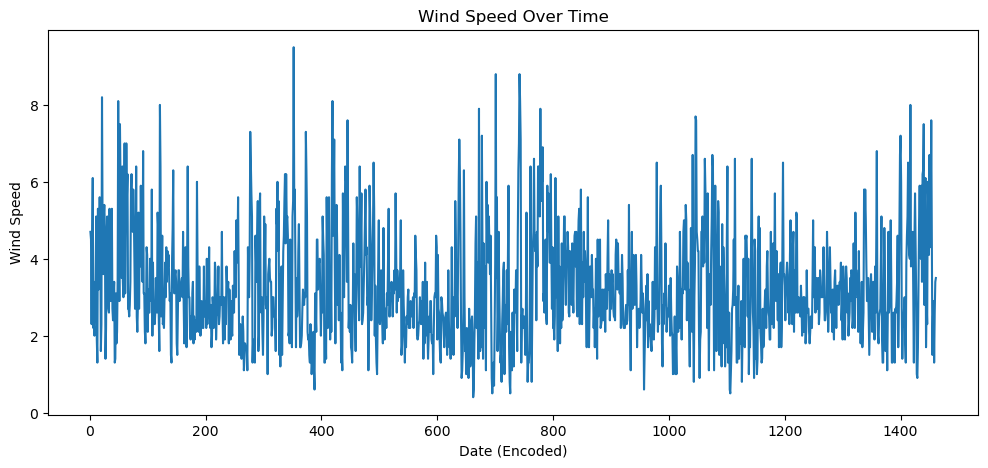

In [173]:
# Wind over time
plt.figure(figsize=(12,5))
plt.plot(df['date_ord'], df['wind'])
plt.xlabel('Date (Encoded)')
plt.ylabel('Wind Speed')
plt.title('Wind Speed Over Time')
plt.show()

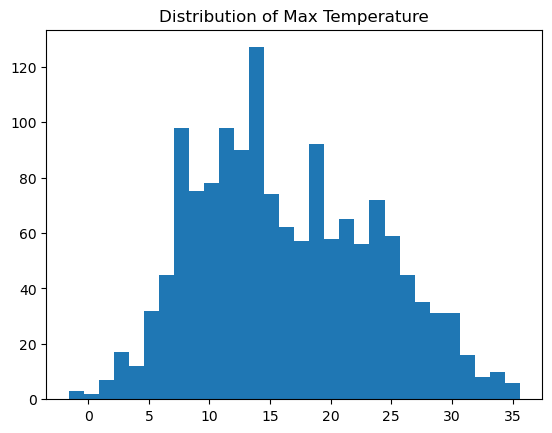

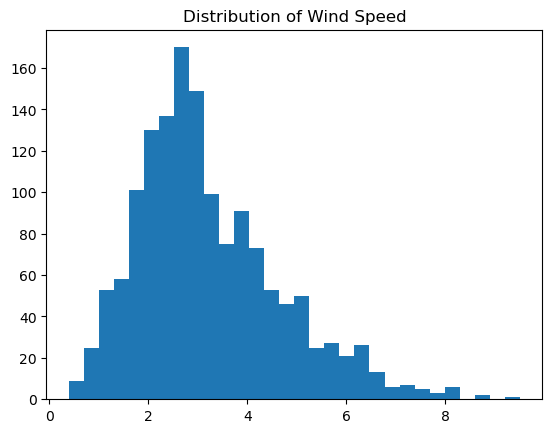

In [175]:
# Histograms-distribution
plt.hist(df['temp_max'], bins=30)
plt.title('Distribution of Max Temperature')
plt.show()

plt.hist(df['wind'], bins=30)
plt.title('Distribution of Wind Speed')
plt.show()

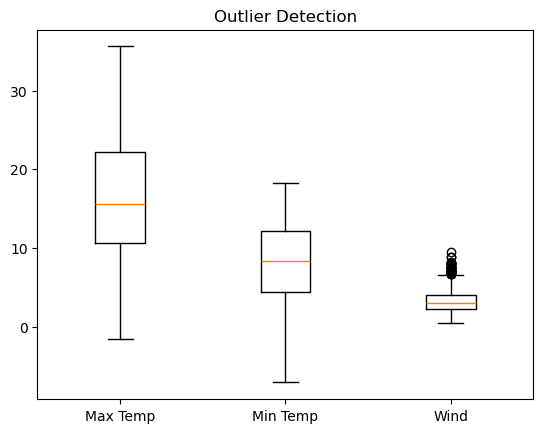

In [177]:
# Boxplot for outliers
plt.boxplot([df['temp_max'], df['temp_min'], df['wind']], labels=['Max Temp','Min Temp','Wind'])
plt.title('Outlier Detection')
plt.show()

## 7. Train-Test Split


In [192]:
# Drop target
X = df.drop(columns=['weather', 'date'])  # drop date as it is redundant
y = df['weather']


    

In [194]:
X

,precipitation,temp_max,temp_min,wind,month,day,weekday,date_ord
0,0.000000,12.8,5.0,4.7,1,1,6,1
1,1.246037,10.6,2.8,4.5,1,2,0,2
2,0.462341,11.7,7.2,2.3,1,3,1,3
3,1.400864,12.2,5.6,4.7,1,4,2,4
4,0.605904,8.9,2.8,6.1,1,5,3,5
...,...,...,...,...,...,...,...,...
1456,1.182268,4.4,1.7,2.9,12,27,6,1457
1457,0.650391,5.0,1.7,1.3,12,28,0,1458
1458,0.000000,7.2,0.6,2.6,12,29,1,1459
1459,0.000000,5.6,-1.0,3.4,12,30,2,1460


In [196]:
y

0       0.0
1       2.0
2       2.0
3       2.0
4       2.0
       ... 
1456    2.0
1457    2.0
1458    1.0
1459    4.0
1460    4.0
Name: weather, Length: 1461, dtype: float64

In [198]:
# Encode categorical features
#X = pd.get_dummies(X, columns=['month', 'day', 'weekday'])
le = LabelEncoder()
y = le.fit_transform(df['weather'].astype(str))  # ensure string before encoding

In [200]:
X

,precipitation,temp_max,temp_min,wind,month,day,weekday,date_ord
0,0.000000,12.8,5.0,4.7,1,1,6,1
1,1.246037,10.6,2.8,4.5,1,2,0,2
2,0.462341,11.7,7.2,2.3,1,3,1,3
3,1.400864,12.2,5.6,4.7,1,4,2,4
4,0.605904,8.9,2.8,6.1,1,5,3,5
...,...,...,...,...,...,...,...,...
1456,1.182268,4.4,1.7,2.9,12,27,6,1457
1457,0.650391,5.0,1.7,1.3,12,28,0,1458
1458,0.000000,7.2,0.6,2.6,12,29,1,1459
1459,0.000000,5.6,-1.0,3.4,12,30,2,1460


In [202]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [204]:
# Optional: Feature Scaling (for KNN, SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 8. Model Training


In [206]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [208]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC()
}

## 9. Model Evaluation


In [210]:
accuracy_dict = {}


# Train & Evaluate
for name, model in models.items():
    # Use scaled features for KNN and SVM, original for others
    if name in ['KNN', 'SVM']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    
    acc = accuracy_score(y_test, y_pred)
    accuracy_dict[name] = acc
    print(f"\n{name} Results:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred, target_names=le.classes_))



Logistic Regression Results:
Accuracy: 0.8361774744027304
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         9
         1.0       0.83      0.20      0.32        25
         2.0       0.94      0.91      0.92       120
         3.0       0.40      0.25      0.31         8
         4.0       0.78      0.98      0.87       131

    accuracy                           0.84       293
   macro avg       0.59      0.47      0.48       293
weighted avg       0.81      0.84      0.80       293


Decision Tree Results:
Accuracy: 0.7986348122866894
              precision    recall  f1-score   support

         0.0       0.38      0.67      0.48         9
         1.0       0.35      0.28      0.31        25
         2.0       0.94      0.91      0.92       120
         3.0       0.44      0.50      0.47         8
         4.0       0.82      0.82      0.82       131

    accuracy                           0.80       293
   macro avg       

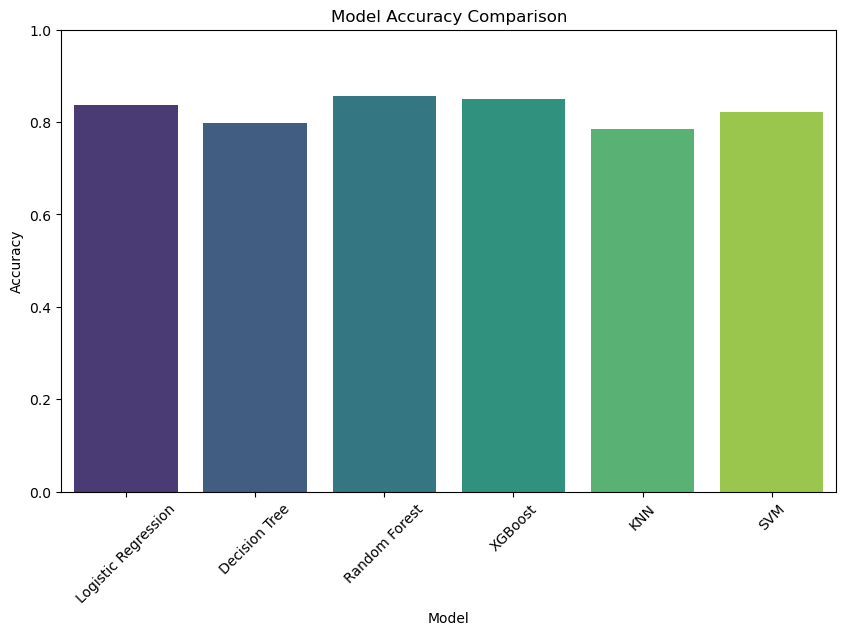

In [212]:

acc_df = pd.DataFrame(list(accuracy_dict.items()), columns=['Model', 'Accuracy'])

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Model', y='Accuracy', data=acc_df, palette='viridis')
plt.ylim(0, 1)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()


# Conclusion
### Random Forest performed best with 86% accuracy.
### Temperature and precipitation were the most important features.
### This model can help predict daily weather conditions effectively.

# Save the final model.

In [252]:
import joblib
joblib.dump(model, 'best_weather_model.pkl')


['best_weather_model.pkl']

In [269]:
new_data = {
    'precipitation': [0.2, 2.5, 3.1],
    'temp_max': [25.0, 22.0, 18.0],
    'temp_min': [15.0, 14.0, 10.0],
    'wind': [3.2, 4.1, 5.6],
    'month': [6, 6, 7],
    'day': [12, 13, 14],
    'weekday': [2, 3, 4],
    'date_ord': [738700, 738701, 738702]
}


new_data = pd.DataFrame([new_data])


In [277]:
new_data = new_data.applymap(lambda x: int(x[0]) if isinstance(x, (list, tuple)) else int(x))


In [279]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   precipitation  1 non-null      int64
 1   temp_max       1 non-null      int64
 2   temp_min       1 non-null      int64
 3   wind           1 non-null      int64
 4   month          1 non-null      int64
 5   day            1 non-null      int64
 6   weekday        1 non-null      int64
 7   date_ord       1 non-null      int64
dtypes: int64(8)
memory usage: 196.0 bytes


In [281]:
loaded_model = joblib.load('best_weather_model.pkl')


In [283]:
pred = loaded_model.predict(new_data)
pred_label = le.inverse_transform(pred)
print("Predicted Weather:", pred_label)

Predicted Weather: ['4.0']
